In [2]:
import os
import scipy.io
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pickle
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [3]:
def load_cache(path, encoding="latin-1", fix_imports=True):
        """
        encoding latin-1 is default for Python2 compatibility
        """
        with open(path, "rb") as f:
            return pickle.load(f, encoding=encoding, fix_imports=True)
        
def create_unique_ann_list():
        
        for data in dataset['samples']:
            new_ann = data['annotation']
            if new_ann not in cars_annotations:
                cars_annotations.append(new_ann)

def convert_ann_to_num(ann):
    if ann not in cars_annotations:
        cars_annotations.append(ann)
    return cars_annotations.index(ann)

In [6]:
cars_annotations = []
split = load_cache('../data/BoxCars/classification_splits.pkl')['hard']
dataset = load_cache('../data/BoxCars/dataset.pkl')
atlas = load_cache('../data/BoxCars/atlas.pkl')

create_unique_ann_list()
print('Number of annotations ' + str(len(cars_annotations)))

Number of annotations 693


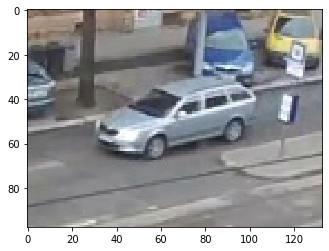

In [7]:
# Show what atlas can do
image = cv2.cvtColor(cv2.imdecode(atlas[3117][0], 1), cv2.COLOR_BGR2RGB)
plt.imshow(image)

The hard split contains 107 fine-grained classes 
11 653 tracks (51 691 images) for training and 11 125 tracks (39 149 images)
for testing

In [41]:
dataset['samples'][14000]

{'to_camera': True,
 'annotation': 'skoda fabia combi mk2',
 'instances': [{'instance_id': 0, '3DBB': array([[629.445, 156.134],
          [671.114, 161.864],
          [711.189, 141.932],
          [672.224, 137.282],
          [626.92 , 201.338],
          [667.48 , 208.321],
          [706.989, 184.554],
          [668.99 , 178.845]]), '2DBB': array([30, 30, 83, 68]), '3DBB_offset': array([598, 109]), 'path': 'kostel/0/014000_000.png'},
  {'instance_id': 1, '3DBB': array([[397.215, 264.138],
          [448.918, 277.915],
          [545.276, 229.165],
          [497.216, 219.259],
          [401.773, 327.747],
          [451.747, 343.924],
          [544.604, 287.226],
          [498.053, 275.434]]), '2DBB': array([ 30,  30, 146, 114]), '3DBB_offset': array([370, 194]), 'path': 'kostel/0/014000_001.png'},
  {'instance_id': 2, '3DBB': array([[ 67.6323, 418.505 ],
          [130.609 , 455.469 ],
          [318.688 , 357.099 ],
          [255.38  , 333.068 ],
          [ 87.7466, 489.83